In [1]:
import pvdeg
import pickle

In [2]:
with open("small_usa_geometa.pkl", "rb") as f:
    meta = pickle.load(f)

with open("small_usa_geoweather.pkl", "rb") as f:
    weather = pickle.load(f)

# meta
# weather

In [7]:
# weather time index will be in utc at this point
# localizes/rolls inside of the functinon
res = pvdeg.pysam.inspire_ground_irradiance(
    weather_df=weather.isel(gid=0).to_dataframe(),
    meta=meta.iloc[0].to_dict(),
    config_files={"pv": "01_pvsamv1.json"},
)

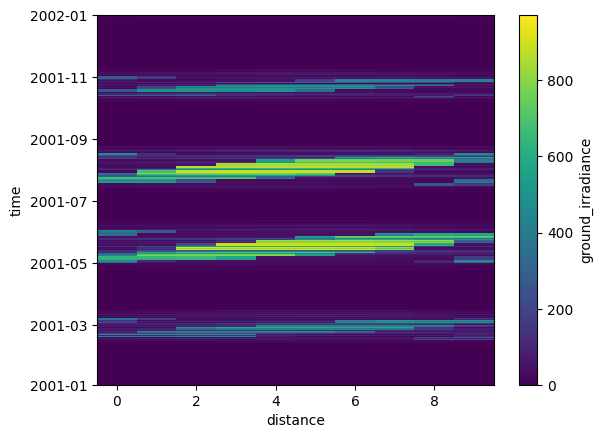

In [11]:
res.ground_irradiance.plot()